Tianyou Xiao (tx43), Ziyu Song (zs363)

CS 5785 HW 3

some references: 

http://parneetk.github.io/blog/neural-networks-in-keras/

https://www.ics.uci.edu/~mohamadt/keras_mnist.html

In [ ]:
!pip install keras==2.4.3

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(a) Loading Dataset

In [ ]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
print("train_x shape:", train_x.shape)
print("train samples:", train_x.shape[0])
print("test samples:", test_x.shape[0])

train_x shape: (60000, 28, 28)
train samples: 60000
test samples: 10000


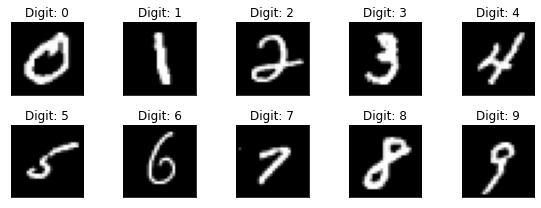

In [ ]:
# show examples from each number class
num_classes = len(np.unique(train_y))
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_x[train_y[:]==i,:]
    ax.set_title("Digit: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.tight_layout()
plt.show()

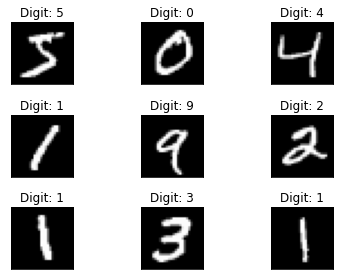

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(train_x[i], cmap='gray')
  plt.title("Digit: {}".format(train_y[i]))
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()

(b) Preprocessing

In [ ]:
from keras.utils import to_categorical

# original data is uint8 (0-255). scale images to the [0, 1] range
train_x = train_x.astype("float32") / 255
test_x = test_x.astype("float32") / 255

# make sure images have shape (28, 28, 1)
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)
print("train_x shape:", train_x.shape)
print("train samples:", train_x.shape[0])
print("test samples:", test_x.shape[0])

# convert class vectors to binary class matrices
# represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
num_classes = 10
print("Shape before one-hot encoding: ", train_y.shape)
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)
print("Shape after one-hot encoding: ", train_y.shape)

train_x shape: (60000, 28, 28, 1)
train samples: 60000
test samples: 10000
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


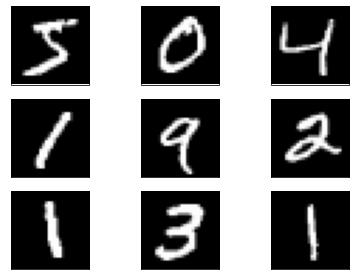

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(train_x[i].reshape(28,28), cmap='gray')
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()

(c) Implementation

In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten 
from keras.optimizers import SGD

In [ ]:
# source: code provided in hw prompt
def create_cnn():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax')) 
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_tmp = create_cnn()
model_tmp.layers
model_tmp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


(d) Training and Evaluating CNN

In [ ]:
model_tmp.fit(train_x, train_y, batch_size=32, epochs=10, validation_split=0.1)
score_tmp = model_tmp.evaluate(test_x, test_y, verbose=0)
print('Test cross-entropy loss: %0.5f' % score_tmp[0])
print('Test accuracy: %0.5f' % score_tmp[1])

Epoch 1/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1765 - accuracy: 0.9470 - val_loss: 0.0673 - val_accuracy: 0.9828
Epoch 2/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0573 - val_accuracy: 0.9828
Epoch 3/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0482 - val_accuracy: 0.9853
Epoch 4/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 5/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0465 - val_accuracy: 0.9882
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.0500 - val_accuracy: 0.9878
Epoch 7/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0463 -

(e) Experimentation

In [ ]:
model = create_cnn()
epoch_history = model.fit(train_x, train_y, batch_size=32, epochs=50, validation_split=0.1)
# print validation and training accuracy over epochs
print(epoch_history.history['accuracy']) 
print(epoch_history.history['val_accuracy'])

Epoch 1/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1652 - accuracy: 0.9500 - val_loss: 0.0594 - val_accuracy: 0.9842
Epoch 2/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0555 - accuracy: 0.9834 - val_loss: 0.0519 - val_accuracy: 0.9858
Epoch 3/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0508 - val_accuracy: 0.9863
Epoch 4/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0476 - val_accuracy: 0.9865
Epoch 5/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0478 - val_accuracy: 0.9877
Epoch 6/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0474 - val_accuracy: 0.9893
Epoch 7/50
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0451 -

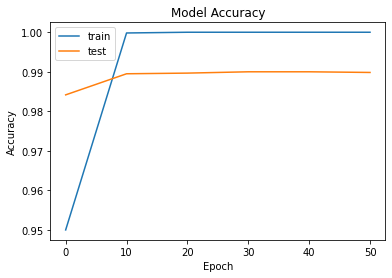

In [ ]:
plt.plot(range(0,51,10), epoch_history.history['accuracy'][::10]+[epoch_history.history['accuracy'][-1]])
plt.plot(range(0,51,10), epoch_history.history['val_accuracy'][::10]+[epoch_history.history['val_accuracy'][-1]])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train', 'test'], loc='upper left')

(e) Experimentation ii: add Dropout layer

In [ ]:
def create_cnn_2(): 
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax')) 
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_2 = create_cnn_2()
epoch_history_2 = model_2.fit(train_x, train_y, batch_size=32, epochs=50, validation_split=0.1)
# print validation and training accuracy over epochs
print(epoch_history_2.history['accuracy']) 
print(epoch_history_2.history['val_accuracy'])

Epoch 1/50
1688/1688 [==============================] - 27s 16ms/step - loss: 0.2167 - accuracy: 0.9309 - val_loss: 0.0740 - val_accuracy: 0.9807
Epoch 2/50
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0888 - accuracy: 0.9725 - val_loss: 0.0528 - val_accuracy: 0.9858
Epoch 3/50
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.0462 - val_accuracy: 0.9878
Epoch 4/50
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0534 - accuracy: 0.9830 - val_loss: 0.0445 - val_accuracy: 0.9880
Epoch 5/50
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.0462 - val_accuracy: 0.9887
Epoch 6/50
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0407 - val_accuracy: 0.9900
Epoch 7/50
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0334 - accuracy: 0.9888 - val_loss: 0.0398 -

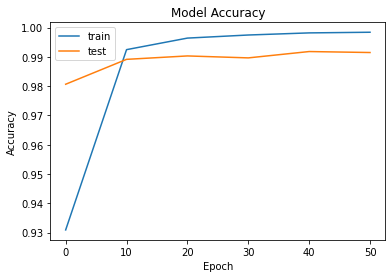

In [ ]:
plt.plot(range(0,51,10), epoch_history_2.history['accuracy'][::10]+[epoch_history_2.history['accuracy'][-1]])
plt.plot(range(0,51,10), epoch_history_2.history['val_accuracy'][::10]+[epoch_history_2.history['val_accuracy'][-1]])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

(e) Experimentation iii: add another convolution layer and maxpooling layer

In [ ]:
def create_cnn_3(): 
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Convolution layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax')) 
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_3 = create_cnn_3()
model_3.fit(train_x, train_y, batch_size=32, epochs=10, validation_split=0.1)
score_3 = model_3.evaluate(test_x, test_y, verbose=0)
print('Test cross-entropy loss: %0.5f' % score_3[0])
print('Test accuracy: %0.5f' % score_3[1])

Epoch 1/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.1961 - accuracy: 0.9375 - val_loss: 0.0458 - val_accuracy: 0.9872
Epoch 2/10
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0799 - accuracy: 0.9749 - val_loss: 0.0363 - val_accuracy: 0.9895
Epoch 3/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0622 - accuracy: 0.9801 - val_loss: 0.0349 - val_accuracy: 0.9897
Epoch 4/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0344 - val_accuracy: 0.9903
Epoch 5/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0440 - accuracy: 0.9854 - val_loss: 0.0293 - val_accuracy: 0.9915
Epoch 6/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0411 - accuracy: 0.9865 - val_loss: 0.0282 - val_accuracy: 0.9923
Epoch 7/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 0.0359 -

In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

(e) Experimentation iv: vary the learning rate

In [ ]:
def simple_cnn(): 
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Convolution layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
# learning rate = 0.001
model_4 = simple_cnn()
opt = SGD(lr=0.001, momentum=0.9)
model_4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_4.fit(train_x, train_y, batch_size=32, epochs=10, validation_split=0.1)
end = time.time()
score_4 = model_4.evaluate(test_x, test_y, verbose=0)
print('Model took %0.2f seconds to train' % (end - start))
print('Test cross-entropy loss: %0.5f' % score_4[0])
print('Test accuracy: %0.5f' % score_4[1])

Epoch 1/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.4064 - accuracy: 0.8713 - val_loss: 0.0984 - val_accuracy: 0.9727
Epoch 2/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.1590 - accuracy: 0.9505 - val_loss: 0.0708 - val_accuracy: 0.9803
Epoch 3/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1209 - accuracy: 0.9619 - val_loss: 0.0570 - val_accuracy: 0.9847
Epoch 4/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1030 - accuracy: 0.9674 - val_loss: 0.0532 - val_accuracy: 0.9853
Epoch 5/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0906 - accuracy: 0.9720 - val_loss: 0.0470 - val_accuracy: 0.9872
Epoch 6/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0836 - accuracy: 0.9740 - val_loss: 0.0471 - val_accuracy: 0.9880
Epoch 7/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0756 - accuracy: 0.9760 - val_loss: 0.0435 -

In [ ]:
# learning rate = 0.1
model_5 = simple_cnn()
opt = SGD(lr=0.1, momentum=0.9)
model_5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_5.fit(train_x, train_y, batch_size=32, epochs=10, validation_split=0.1)
end = time.time()
score_5 = model_5.evaluate(test_x, test_y, verbose=0)
print('Model took %0.2f seconds to train' % (end - start))
print('Test cross-entropy loss: %0.5f' % score_5[0])
print('Test accuracy: %0.5f' % score_5[1])

Epoch 1/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.9938 - accuracy: 0.7203 - val_loss: 1.1100 - val_accuracy: 0.5977
Epoch 2/10
1688/1688 [==============================] - 40s 24ms/step - loss: 1.3399 - accuracy: 0.5956 - val_loss: 0.8920 - val_accuracy: 0.7420
Epoch 3/10
1688/1688 [==============================] - 41s 24ms/step - loss: 1.5616 - accuracy: 0.4936 - val_loss: 2.3090 - val_accuracy: 0.1045
Epoch 4/10
1688/1688 [==============================] - 41s 24ms/step - loss: 2.3085 - accuracy: 0.1046 - val_loss: 2.3069 - val_accuracy: 0.1113
Epoch 5/10
1688/1688 [==============================] - 41s 24ms/step - loss: 2.3082 - accuracy: 0.1029 - val_loss: 2.3089 - val_accuracy: 0.0915
Epoch 6/10
1688/1688 [==============================] - 41s 24ms/step - loss: 2.3089 - accuracy: 0.1062 - val_loss: 2.3068 - val_accuracy: 0.0995
Epoch 7/10
1688/1688 [==============================] - 40s 24ms/step - loss: 2.3078 - accuracy: 0.1038 - val_loss: 2.3097 -